In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from ultralytics import YOLO

## 0. Functions

In [17]:
def convert_from_yolo_to_cv2(input_txt, width=28*5, height=28):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]    
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(width))
        temp[2] = round(float(temp[2])*(height))
        temp[3] = round(float(temp[3])*(width))
        temp[4] = round(float(temp[4])*(height))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [18]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample),
                                   pt1=(i[1],i[4]),
                                   pt2=(i[2],i[3]),
                                   color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
    
    print(sorted([(i[1], i[0]) for i in ann_sample]))
    
    return img_sample

## Run model google 

In [31]:
perturbed_img_path = "GANs_training/GANs_training_google3/image_samples"

In [32]:
model=YOLO('./model_results/model_google_data_32/best.pt')

In [33]:
data = os.listdir(f'./{perturbed_img_path}/')
data_perturbed = sorted([i for i in data if 'perturbed' in i])
data_org = sorted([i for i in data if 'original' in i])

In [34]:
display(data_perturbed)
display(data_org)

['perturbed_0.png',
 'perturbed_1.png',
 'perturbed_2.png',
 'perturbed_3.png',
 'perturbed_4.png',
 'perturbed_5.png',
 'perturbed_6.png',
 'perturbed_7.png',
 'perturbed_8.png',
 'perturbed_9.png']

['original_0.png',
 'original_1.png',
 'original_2.png',
 'original_3.png',
 'original_4.png',
 'original_5.png',
 'original_6.png',
 'original_7.png',
 'original_8.png',
 'original_9.png']

In [35]:
for img in data_perturbed:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/perturbed_0.png: 32x32 1 2, 1 5, 8.6ms
Speed: 0.3ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict23
1 label saved to /home/gj2353/ultralytics/runs/detect/predict23/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/perturbed_1.png: 32x32 1 2, 1 6, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict23
2 labels saved to /home/gj2353/ultralytics/runs/detect/predict23/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/perturbed_2.png: 32x32 1 2, 1 6, 9.5ms
Speed: 0.3ms preprocess, 9.5ms inference, 1.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/

In [36]:
pred_folder='predict23'
# read where the file saves to.
# Also, make sure to restart the kernel if you added new images and
# you want those predictions to be saved to a different pred folder

In [37]:
preds_perturb = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_perturb = sorted(preds_perturb)
preds_perturb

['perturbed_0.txt',
 'perturbed_1.txt',
 'perturbed_2.txt',
 'perturbed_3.txt',
 'perturbed_4.txt',
 'perturbed_5.txt',
 'perturbed_6.txt',
 'perturbed_7.txt',
 'perturbed_8.txt',
 'perturbed_9.txt']

In [38]:
for img in data_org:
    model.predict(f'./{perturbed_img_path}/{img}', save_txt=True)


image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/original_0.png: 32x32 1 2, 1 5, 9.1ms
Speed: 0.4ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict23
11 labels saved to /home/gj2353/ultralytics/runs/detect/predict23/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/original_1.png: 32x32 1 2, 1 6, 8.5ms
Speed: 0.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/runs/detect/predict23
12 labels saved to /home/gj2353/ultralytics/runs/detect/predict23/labels

image 1/1 /home/gj2353/e6998-5_final_project/GANs_training/GANs_training_google3/image_samples/original_2.png: 32x32 1 2, 1 6, 8.3ms
Speed: 0.2ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Results saved to /home/gj2353/ultralytics/

In [39]:
preds_org = os.listdir(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels')
preds_org = sorted([i for i in preds_org if 'orig' in i])
preds_org

['original_0.txt',
 'original_1.txt',
 'original_2.txt',
 'original_3.txt',
 'original_4.txt',
 'original_5.txt',
 'original_6.txt',
 'original_7.txt',
 'original_8.txt',
 'original_9.txt']

In [40]:
org_list=[]
org_ann_list = []

for pred in preds_org:
    img = pred.split('.')[0]+'.png'
    org_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
    with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
        sample_annotation = f.read()
        org_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
        f.close()

perturbed_list=[]
perturbed_ann_list = []

for pred in preds_perturb:
    img = pred.split('.')[0]+'.png'
    perturbed_list.append(np.array(Image.open(f'./{perturbed_img_path}/{img}')))
    
    with open(f'/home/gj2353/ultralytics/runs/detect/{pred_folder}/labels/{pred}', "r") as f:
        sample_annotation = f.read()
        perturbed_ann_list.append(convert_from_yolo_to_cv2(sample_annotation, width=32, height=32))
        f.close()


0.91796875


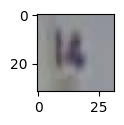

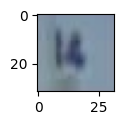

In [41]:
# Check the first image

plt.subplots(figsize=(1,1))
plt.imshow(org_list[0])

plt.subplots(figsize=(1,1))
plt.imshow(perturbed_list[0])

print(np.sum(org_list[0]!=perturbed_list[0])/np.sum(org_list[0]==org_list[0]))

[(5, '1'), (11, '4')]


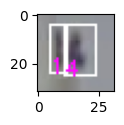

PERTURBED
% difference :  0.91796875
[(5, '1'), (11, '4')]


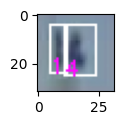

[(6, '1'), (12, '5')]


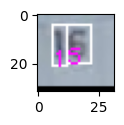

PERTURBED
% difference :  0.9033203125
[(5, '1'), (11, '5')]


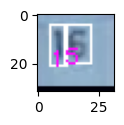

[(5, '5'), (16, '1')]


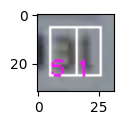

PERTURBED
% difference :  0.904296875
[(5, '5'), (16, '1')]


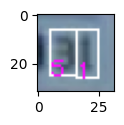

[(5, '7'), (17, '0')]


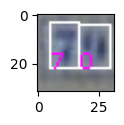

PERTURBED
% difference :  0.8714192708333334
[(4, '7'), (17, '0')]


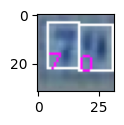

[(4, '2'), (14, '1')]


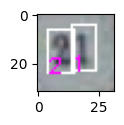

PERTURBED
% difference :  0.9283854166666666
[(4, '2'), (14, '1')]


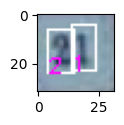

[(18, '0')]


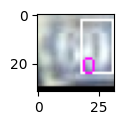

PERTURBED
% difference :  0.923828125
[(3, '6'), (18, '0')]


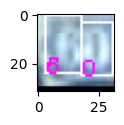

[(5, '8')]


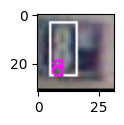

PERTURBED
% difference :  0.8147786458333334
[(5, '8')]


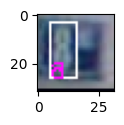

[(5, '2'), (19, '0')]


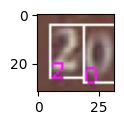

PERTURBED
% difference :  0.8333333333333334
[(5, '2'), (19, '0')]


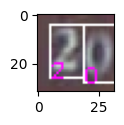

[(13, '3')]


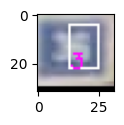

PERTURBED
% difference :  0.841796875
[(3, '2'), (13, '3')]


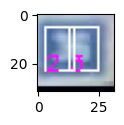

[(4, '2'), (16, '5')]


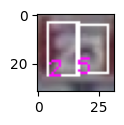

PERTURBED
% difference :  0.8606770833333334
[(4, '2'), (16, '5')]


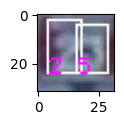

In [42]:
# Check the originval vs. Perturbation predictions

for i in range(len(org_list)):
    plt.subplots(figsize=(1,1))
    img_temp = get_img_with_boxes(org_list[i], org_ann_list[i])
    plt.imshow(img_temp)
    plt.show()
    
    print("PERTURBED")
    print("% difference : ", np.sum(perturbed_list[i]!=org_list[i])/np.sum(org_list[i]==org_list[i]))
    
    img_temp = get_img_with_boxes(perturbed_list[i], perturbed_ann_list[i])
    plt.subplots(figsize=(1,1))    
    plt.imshow(img_temp)
    plt.show()